
# Chapter 1 -> Spark ETL with SQL Database (MySQL | PostgreSQL)

Task to do 
1. Install required spark libraries
2. Create connection with MySQL Database 
3. Read data from MySQL Database
4. Transform data
5. write data into MySQL Server

Spark Libraries

https://mvnrepository.com/artifact/mysql/mysql-connector-java

In [2]:
# First Load all the required library and also Start Spark Session
# Load all the required library
from pyspark.sql import SparkSession

In [3]:
#Start Spark Session
spark = SparkSession.builder.appName("chapter1")\
        .config('spark.jars.packages', 'mysql:mysql-connector-java:8.0.32')\
        .getOrCreate()
sqlContext = SparkSession(spark)
#Dont Show warning only error
spark.sparkContext.setLogLevel("ERROR")

:: loading settings :: url = jar:file:/opt/spark/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
mysql#mysql-connector-java added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-30dfac9d-e29b-4cd5-b1bc-cba3f9c877d8;1.0
	confs: [default]
mysql#mysql-connector-java;8.0.32 is relocated to com.mysql#mysql-connector-j;8.0.32. Please update your dependencies.
	found mysql#mysql-connector-java;8.0.32 in central
	found com.mysql#mysql-connector-j;8.0.32 in central
	found com.google.protobuf#protobuf-java;3.21.9 in central
downloading https://repo1.maven.org/maven2/com/mysql/mysql-connector-j/8.0.32/mysql-connector-j-8.0.32.jar ...
	[SUCCESSFUL ] com.mysql#mysql-connector-j;8.0.32!mysql-connector-j.jar (1353ms)
downloading https://repo1.maven.org/maven2/com/google/protobuf/protobuf-java/3.21.9/protobuf-java-3.21.9.jar ...
	[SUCCESSFUL ] com.google.protobuf#protobuf-java;3.21.9!protobuf-java.jar(bundle) (41571ms)
:: resolution report :: resolve 19355ms :: artif

2. Create connection with SQL Database
3. Read data from SQL Database

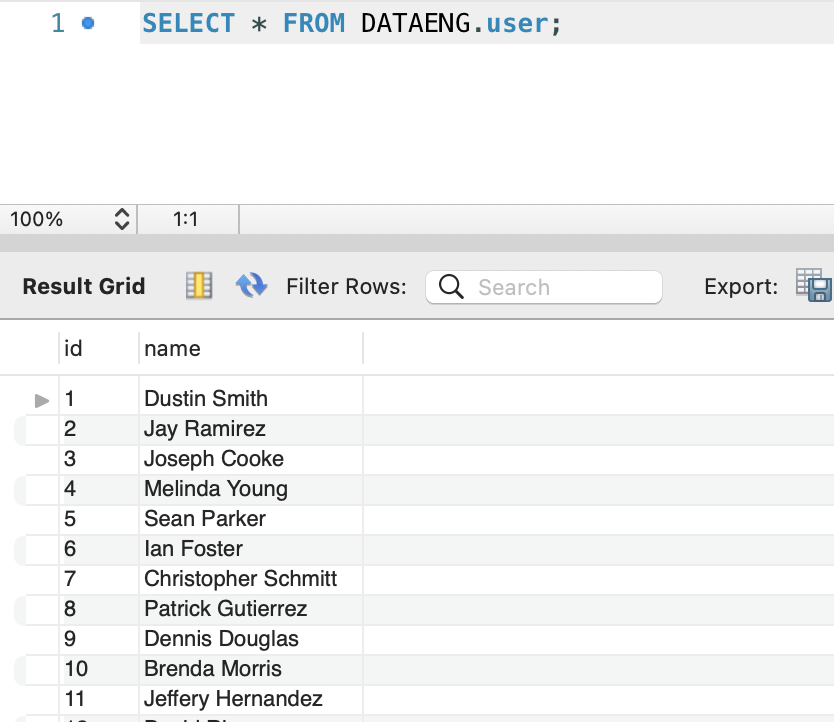


In [7]:
#Load CSV file into DataFrame
mysqldf = spark.read \
    .format("jdbc") \
    .option("driver","com.mysql.cj.jdbc.Driver") \
    .option("url", "jdbc:mysql://192.168.1.104:3306/DATAENG") \
    .option("dbtable", "user") \
    .option("user", "root") \
    .option("password", "mysql") \
    .load()

In [8]:
#Checking dataframe schema
mysqldf.printSchema()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)



In [9]:
mysqldf.show(n=10)

+---+-------------------+
| id|               name|
+---+-------------------+
|  1|       Dustin Smith|
|  2|        Jay Ramirez|
|  3|       Joseph Cooke|
|  4|      Melinda Young|
|  5|        Sean Parker|
|  6|         Ian Foster|
|  7|Christopher Schmitt|
|  8|  Patrick Gutierrez|
|  9|     Dennis Douglas|
| 10|      Brenda Morris|
+---+-------------------+
only showing top 10 rows



In [10]:
mysqldf.createOrReplaceTempView("tempMySQL")

4. Transform data

In [12]:
sqlContext.sql("SELECT * FROM tempMySQL").show(n=5)

+---+-------------+
| id|         name|
+---+-------------+
|  1| Dustin Smith|
|  2|  Jay Ramirez|
|  3| Joseph Cooke|
|  4|Melinda Young|
|  5|  Sean Parker|
+---+-------------+
only showing top 5 rows



In [16]:
newdf = sqlContext.sql("SELECT name as fullname FROM tempMySQL WHERE id > 40")

In [17]:
newdf.count()

10

5. write data into SQL Server

In [18]:
newdf.write \
  .format("jdbc") \
  .option("driver","com.mysql.cj.jdbc.Driver") \
  .option("url", "jdbc:mysql://192.168.1.104:3306/DATAENG") \
  .option("dbtable", "username") \
  .option("user", "root") \
  .option("password", "mysql") \
  .save()

It created table and loaded data into table

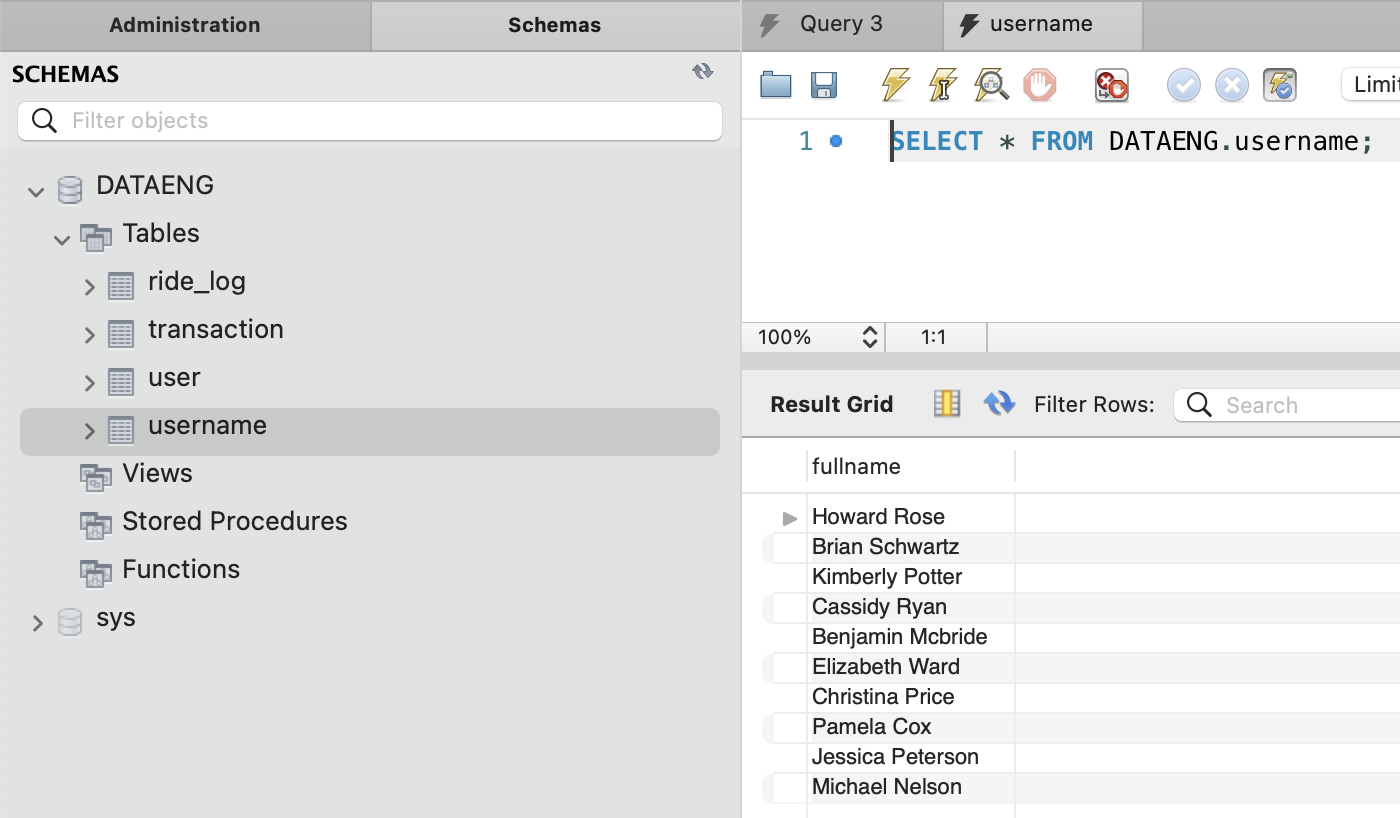